In [ ]:
import pandas as pd
import seaborn as sns

Abrir archivo

In [ ]:
#fileLocation = 'data/'
#fileName = 'synergy_logistics_database.csv'
# Crear df
synergyDF = pd.read_csv('https://raw.githubusercontent.com/ErikaHernandez-bot/EMTECH_PROJECT_2/main/synergy_logistics_database.csv')

In [ ]:
synergyDF.head(10)

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
5,6,Exports,Japan,China,2015,05/02/15,Cars,Sea,Honda,20000000
6,7,Exports,Japan,China,2015,06/02/15,Cars,Sea,Honda,27000000
7,8,Exports,Japan,China,2015,07/02/15,Cars,Sea,Honda,33000000
8,9,Exports,Japan,USA,2015,08/02/15,Machinery and electronics,Air,ReachExt J.J,15000000
9,10,Exports,Japan,USA,2015,09/02/15,Machinery and electronics,Air,ReachExt J.J,31000000


## Rutas de Importacion y Exportación

Definimos una ruta como la combinación única de:
- `direction`, `origin`, `destination`, `transport_mode`

In [ ]:
simpleDF = synergyDF[['direction', 'origin', 'destination', 'transport_mode', 'total_value']]
simpleDF

,direction,origin,destination,transport_mode,total_value
0,Exports,Japan,China,Sea,33000000
1,Exports,Japan,China,Sea,16000000
2,Exports,Japan,China,Sea,29000000
3,Exports,Japan,China,Sea,14000000
4,Exports,Japan,China,Sea,17000000
...,...,...,...,...,...
19051,Imports,Japan,Singapore,Sea,1000000
19052,Imports,Malaysia,Singapore,Sea,2000000
19053,Imports,Malaysia,Singapore,Sea,33000000
19054,Imports,Malaysia,Singapore,Sea,13000000


In [ ]:
rutasUnicas = simpleDF.groupby(['direction', 'origin', 'destination', 'transport_mode']).count()
rutasUnicas

total_value
direction origin               destination          transport_mode             
Exports   Australia            Brazil               Sea                     112
                               Mexico               Sea                      51
                               Philippines          Sea                     114
                               Singapore            Sea                     273
                               Thailand             Sea                     200
...                                                                         ...
Imports   USA                  Japan                Air                      22
                               Thailand             Sea                     109
          United Arab Emirates India                Sea                      20
          United Kingdom       Canada               Sea                      58
          Vietnam              United Arab Emirates Sea                      18

[215 rows x 1 columns]

Ajustar el nombre de la columna

In [ ]:
rutasUnicas = rutasUnicas.rename(columns={'total_value' : 'count'})
rutasUnicas

count
direction origin               destination          transport_mode       
Exports   Australia            Brazil               Sea               112
                               Mexico               Sea                51
                               Philippines          Sea               114
                               Singapore            Sea               273
                               Thailand             Sea               200
...                                                                   ...
Imports   USA                  Japan                Air                22
                               Thailand             Sea               109
          United Arab Emirates India                Sea                20
          United Kingdom       Canada               Sea                58
          Vietnam              United Arab Emirates Sea                18

[215 rows x 1 columns]

In [ ]:
rutasUnicas = rutasUnicas.sort_values(by='count', ascending=False)
rutasUnicas.head(10)

count
direction origin      destination transport_mode       
Exports   South Korea Vietnam     Sea               497
          USA         Netherlands Sea               436
          Netherlands Belgium     Road              374
          China       Mexico      Air               330
          Japan       Brazil      Sea               306
          Germany     France      Road              299
          South Korea Japan       Sea               279
Imports   Singapore   Thailand    Sea               273
Exports   Australia   Singapore   Sea               273
          Canada      Mexico      Rail              261

Separar `rutasUnicas` por `direction`

In [ ]:
rutasExp = rutasUnicas.xs('Exports')
rutasExp

count
origin      destination    transport_mode       
South Korea Vietnam        Sea               497
USA         Netherlands    Sea               436
Netherlands Belgium        Road              374
China       Mexico         Air               330
Japan       Brazil         Sea               306
...                                          ...
France      Russia         Rail               13
Germany     United Kingdom Air                10
            Mexico         Air                 9
France      Austria        Rail                7
Netherlands Belgium        Sea                 1

[163 rows x 1 columns]

Nueva columna, con el nombre que usaremos para la gráfica

In [ ]:
rutasExp['nombre'] = rutasExp.index.to_list()
rutasExp

count                          nombre
origin      destination    transport_mode                                       
South Korea Vietnam        Sea               497     (South Korea, Vietnam, Sea)
USA         Netherlands    Sea               436         (USA, Netherlands, Sea)
Netherlands Belgium        Road              374    (Netherlands, Belgium, Road)
China       Mexico         Air               330            (China, Mexico, Air)
Japan       Brazil         Sea               306            (Japan, Brazil, Sea)
...                                          ...                             ...
France      Russia         Rail               13          (France, Russia, Rail)
Germany     United Kingdom Air                10  (Germany, United Kingdom, Air)
            Mexico         Air                 9          (Germany, Mexico, Air)
France      Austria        Rail                7         (France, Austria, Rail)
Netherlands Belgium        Sea                 1     (Netherlands, Belgium, Sea)

[163 rows x 2 columns]

In [ ]:
def nombre_chido(lista):
    nombre = f'{lista[0]} - {lista[1]}, {lista[2]}'
    return nombre

rutasExp['nombre'] = rutasExp['nombre'].apply(nombre_chido)
rutasExp

count                         nombre
origin      destination    transport_mode                                      
South Korea Vietnam        Sea               497     South Korea - Vietnam, Sea
USA         Netherlands    Sea               436         USA - Netherlands, Sea
Netherlands Belgium        Road              374    Netherlands - Belgium, Road
China       Mexico         Air               330            China - Mexico, Air
Japan       Brazil         Sea               306            Japan - Brazil, Sea
...                                          ...                            ...
France      Russia         Rail               13          France - Russia, Rail
Germany     United Kingdom Air                10  Germany - United Kingdom, Air
            Mexico         Air                 9          Germany - Mexico, Air
France      Austria        Rail                7         France - Austria, Rail
Netherlands Belgium        Sea                 1     Netherlands - Belgium, Sea

[163 rows x 2 columns]

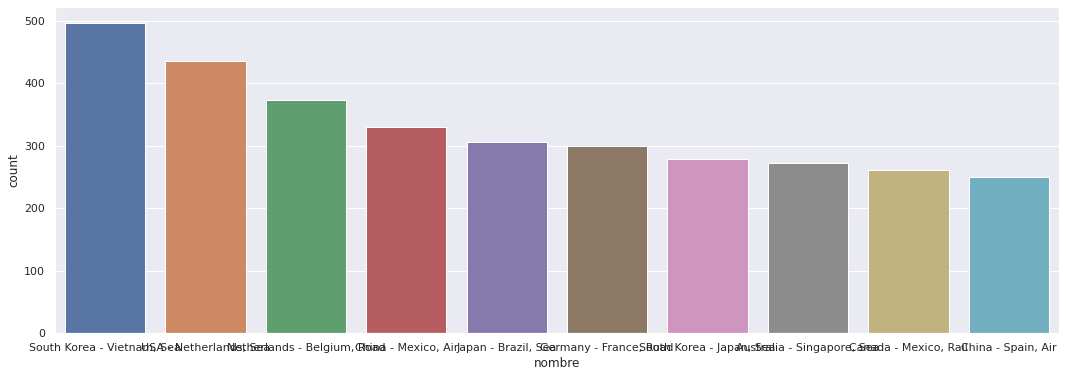

In [ ]:
sns.set(rc={"figure.figsize": (18, 6)}) 
sns.barplot(data=rutasExp.head(10), x='nombre', y='count')

In [ ]:
rutasImp = rutasUnicas.xs('Imports')
rutasImp

,,,count
origin,destination,transport_mode,
Singapore,Thailand,Sea,273
Germany,China,Sea,233
China,Japan,Air,210
Japan,Mexico,Sea,206
Malaysia,Thailand,Rail,195
China,Thailand,Road,145
Spain,Germany,Road,142
China,United Arab Emirates,Sea,114
Brazil,China,Sea,113


Medio de transporte utilizado


In [ ]:
rutasImp['nombre'] = rutasImp.index.to_list()
rutasImp

,,,count,nombre
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,"(Singapore, Thailand, Sea)"
Germany,China,Sea,233,"(Germany, China, Sea)"
China,Japan,Air,210,"(China, Japan, Air)"
Japan,Mexico,Sea,206,"(Japan, Mexico, Sea)"
Malaysia,Thailand,Rail,195,"(Malaysia, Thailand, Rail)"
China,Thailand,Road,145,"(China, Thailand, Road)"
Spain,Germany,Road,142,"(Spain, Germany, Road)"
China,United Arab Emirates,Sea,114,"(China, United Arab Emirates, Sea)"
Brazil,China,Sea,113,"(Brazil, China, Sea)"


In [ ]:
def nombre_chido(lista):
    nombre = f'{lista[0]} - {lista[1]}, {lista[2]}'
    return nombre

rutasImp['nombre'] = rutasImp['nombre'].apply(nombre_chido)
rutasImp

,,,count,nombre
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,"Singapore - Thailand, Sea"
Germany,China,Sea,233,"Germany - China, Sea"
China,Japan,Air,210,"China - Japan, Air"
Japan,Mexico,Sea,206,"Japan - Mexico, Sea"
Malaysia,Thailand,Rail,195,"Malaysia - Thailand, Rail"
China,Thailand,Road,145,"China - Thailand, Road"
Spain,Germany,Road,142,"Spain - Germany, Road"
China,United Arab Emirates,Sea,114,"China - United Arab Emirates, Sea"
Brazil,China,Sea,113,"Brazil - China, Sea"


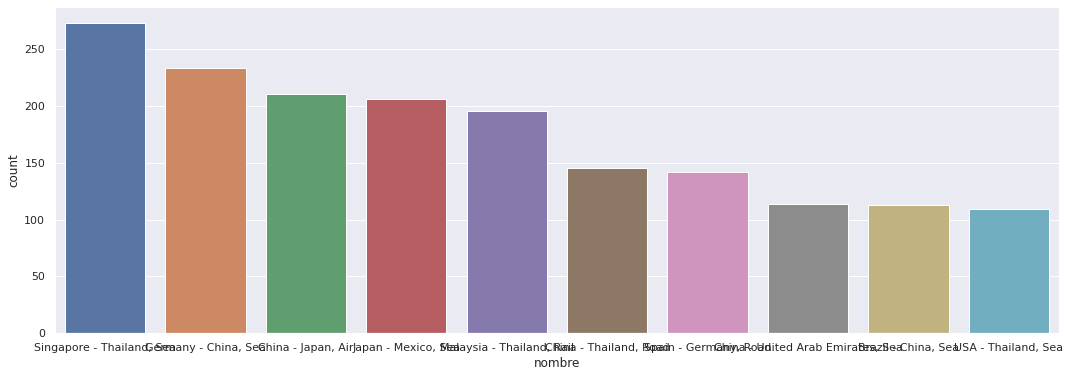

In [ ]:
sns.set(rc={"figure.figsize": (18, 6)}) 
sns.barplot(data=rutasImp.head(10), x='nombre', y='count')